In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from hrithika_model import spec_grav_model

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# !nvidia-smi

In [4]:
BATCH_SIZE = 32
INPUT_SHAPE = (256, 64, 3)
LEN_TRAIN = 6000
LEN_VAL = 1500

In [5]:
img_data = ImageDataGenerator(
                rescale = 1./255
           )

In [6]:
train_gen = img_data.flow_from_directory(
                'spec_grav_data/train',
                target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
                batch_size=BATCH_SIZE,
                class_mode='sparse',
                classes=['bbh', 'bns', 'noise'],
                shuffle=True,
                seed=101
            )
val_gen = img_data.flow_from_directory(
                'spec_grav_data/val',
                target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
                batch_size=BATCH_SIZE,
                class_mode='sparse',
                classes=['bbh', 'bns', 'noise']
            )

Found 6000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [7]:
model = spec_grav_model(input_shape=INPUT_SHAPE)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 64, 3)]      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 127, 31, 32)       896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 63, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 7, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 5, 64)         18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 2, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0   

In [9]:
filepath = './spec_grav_model_files/spec-grav-{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=False, verbose=1)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
              train_gen,
              steps_per_epoch=(LEN_TRAIN//BATCH_SIZE),
              epochs=10,
              validation_data=val_gen,
              validation_steps=(LEN_VAL//BATCH_SIZE),
              callbacks=[model_checkpoint]
          )

Epoch 1/10
187/187 [==============================] - ETA: 0s - loss: 0.1164 - accuracy: 0.9616
Epoch 00001: saving model to ./spec_grav_model_files/spec-grav-01-1.00.hdf5
187/187 [==============================] - 21s 113ms/step - loss: 0.1164 - accuracy: 0.9616 - val_loss: 0.0149 - val_accuracy: 0.9973
Epoch 2/10
187/187 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9968
Epoch 00002: saving model to ./spec_grav_model_files/spec-grav-02-1.00.hdf5
187/187 [==============================] - 15s 80ms/step - loss: 0.0132 - accuracy: 0.9968 - val_loss: 0.0144 - val_accuracy: 0.9966
Epoch 3/10
187/187 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9985
Epoch 00003: saving model to ./spec_grav_model_files/spec-grav-03-1.00.hdf5
187/187 [==============================] - 20s 107ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/10
187/187 [==============================] - ETA: 0s - loss: 0.0034 - accu

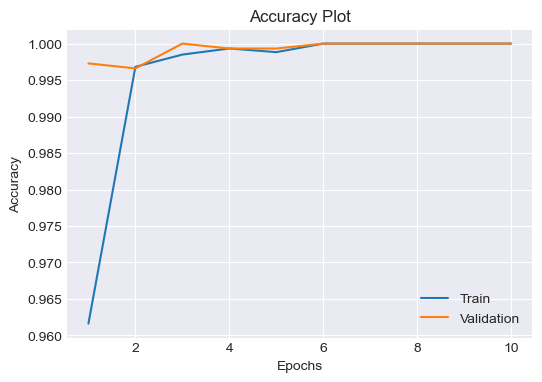

In [64]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

epochs = range(1, 11)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_acc, label='Train')
plt.plot(epochs, val_acc, label='Validation')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

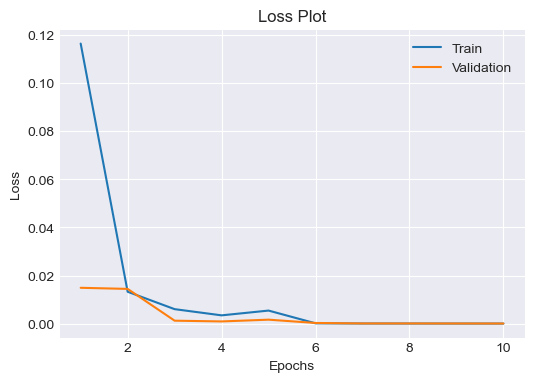

In [72]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss, label='Train')
plt.plot(epochs, val_loss, label='Validation')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();